#   Exploration of Jupyter Notebook: Yelp Reviews

**Original Noteboook:**
https://nbviewer.jupyter.org/github/xun-tang/pyladies_jupyter_demo/blob/master/Predict_Review_Five_Star_Rating.ipynb

**Author:** Xun Tang

**Summary of Original Notebook:**

In the above linked Jupyter Notebook, based on a user's past reviews on Yelp, the author tries to predict how likely a review will be five stars when the user rates a business they have never previously reviewed. The author uses the python libraries pandas, seaborn, matplotlib, sklearn and numpy to visualize the data and imploy a logistic regression model on a Yelp-challenge data set. 

The author uses the pandas library to create a dataframe of the preprocessed data. They then use seaborn and matplotlib to visualize the data frame and analysize the data before processing. Jupyter Notebook's markdown cells are utilized to delineate the authors approach at each step. Next the author works with pandas again to perform feature engineering on the data frame to prepare the data for logistic regression. After preparing the data, the author uses the sklearn library to instantiate training and test sets and then perform the actual calculations of logistic regression and cross-validation. The performance of the logistics regression model is then evaluated using sklearn, numpy and matplotlib to visualize the model's performance metrics in Jupter Notebook. After the model is created and evaluated, the author lastly uses the model to predict if a specific review is 5 stars or not. In this final section, the author takes advantage of Jupyter Notebook's ability to incorporate images and integrate with the web to include screen shots and links for the actual reviews on Yelp.

**Proposed New Problem:**

The original notebook used logistic regression to predict a binary outcome and utilized information from three separate files of the Yelp-challenge data set.

A smaller problem set I wish to look at will examine only one file from the data set and determine if a review has at least one useful vote how likely is it to be a four or five star review?

**Problem Solving Approach:**

(1) Load Data

(2) Visualize Data

(3) Feature Engineering

(4) Create Logistic Regression Model

(5) Evaluate Model


## Load Data 

***
The data set for the Yelp challenge has over 6 million entries, which is too large for my machine to handle, so I will only import 1000 entries from one of the files.
***

In [1]:
# Import library to create and handle dataframes as well as manipulate the information in the dataframes.
import pandas as pd

In [2]:
url = 'https://drive.google.com/file/d/1BnO0KoshmhBF_6fAVoc1fvZ7lEK3r4JK/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
review_df = pd.read_csv(path)

### View first rows of each data frame

In [3]:
#This pandas function allows for examination the columns and observation of the data in certain rows.
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


### Determine unique values and counts of the relevant columns

In [4]:
# This pandas function is helpful in evaluating the number of unique values in the useful field 
# and how many observations pertain to each value.
review_df['useful'].value_counts()

0     580
1     218
2      72
3      50
4      35
5      18
6       7
8       6
7       5
12      3
16      2
49      1
27      1
13      1
9       1
Name: useful, dtype: int64

***
It looks like most reviews do not have any votes for usefulness.
***

In [5]:
# This pandas function is helpful in evaluating the number of unique values in the stars field 
# and how many observations pertain to each value.
review_df['stars'].value_counts()

5    387
4    283
1    123
3    117
2     90
Name: stars, dtype: int64

***
It looks like most are either a four or five star.
***

## Visualize Data

In [6]:
# The seaborn and matplotlib libraries are used for the creation and formating
# of data visualization tools like charts and graphs and the inline call of matplotlib will allow the outputs
# to appear and be stored within the notebook.
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Set context to "paper" for figure aesthetics 
# The original notebook set this to "talk", but as this notebook will not be presented on a large stage
# "paper" is more appropriate
sns.set_context(context="paper")
# set plot color palette and axis style
sns.set(palette='winter',rc={"figure.figsize": (25, 5)}, style="ticks")

### Distribution of Star Ratings

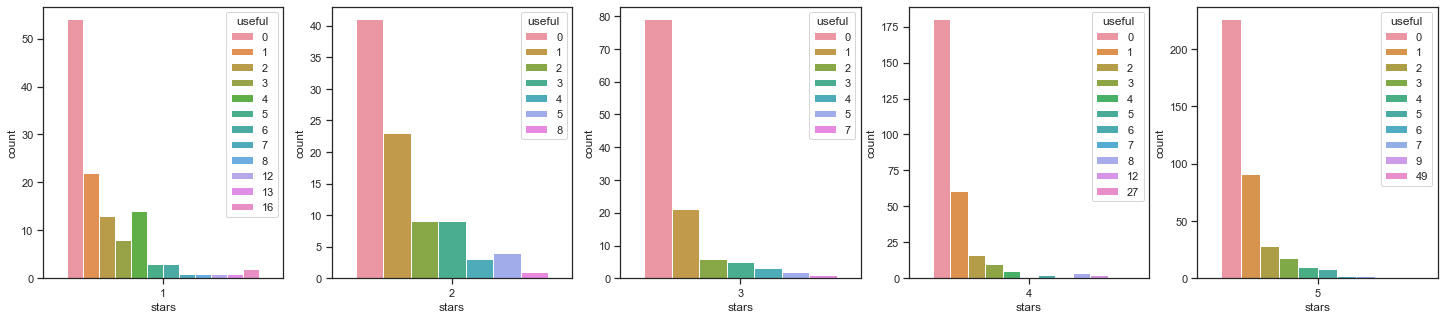

In [7]:
# Pandas is used to seperate dateframes by star ratings
one_star_df = review_df[review_df.stars == 1]
two_star_df = review_df[review_df.stars == 2]
three_star_df = review_df[review_df.stars == 3]
four_star_df = review_df[review_df.stars == 4]
five_star_df = review_df[review_df.stars == 5]

# Seaborn is used to create countplots and matplotlib is used to organize the plots next to eachother.
plt.subplot(1,5,1)
ax1 = sns.countplot(x='stars', data=one_star_df, hue='useful')
plt.subplot(1,5,2)
ax2 = sns.countplot(x='stars', data=two_star_df, hue='useful')
plt.subplot(1,5,3)
ax3 = sns.countplot(x='stars', data=three_star_df, hue='useful')
plt.subplot(1,5,4)
ax4 = sns.countplot(x='stars', data=four_star_df, hue='useful')
plt.subplot(1,5,5)
ax5 = sns.countplot(x='stars', data=five_star_df, hue='useful')


***
It looks like five-star and four-star reviews may have the most usefulness votes.
***

Five star votes: 365
Four star votes: 250
Three star votes: 77
Two star votes: 108
One star votes: 233


<function matplotlib.pyplot.show(close=None, block=None)>

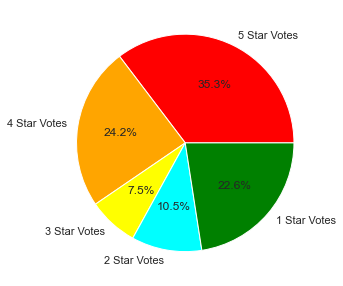

In [8]:
# Use pandas to count the number of useful votes each star rating has.
total_5star_votes = five_star_df['useful'].sum()
total_4star_votes = four_star_df['useful'].sum()
total_3star_votes = three_star_df['useful'].sum()
total_2star_votes = two_star_df['useful'].sum()
total_1star_votes = one_star_df['useful'].sum()

print('Five star votes:',total_5star_votes)
print('Four star votes:',total_4star_votes)
print('Three star votes:',total_3star_votes)
print('Two star votes:',total_2star_votes)
print('One star votes:',total_1star_votes)

#Use matplotlib to visualize the proportion of usefulness votes among the star ratings.
model = ['5 Star Votes','4 Star Votes','3 Star Votes','2 Star Votes','1 Star Votes']
numbers = [total_5star_votes,total_4star_votes,total_3star_votes,total_2star_votes,total_1star_votes]
plt.pie(numbers,labels=model,autopct='%0.1f%%',colors = ['red','orange','yellow','cyan','green'])
plt.show

***
It looks like five-star and four-star reviews have the most usefulness votes followed by one-star reviews.
***

## Feature Engineering

In [9]:
# Use pandas to copy data frame and display column names
df = review_df.copy()
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [10]:
# Use pandas to drop unneeded columns.
columns = ['user_id','review_id','business_id','funny','cool','text','date']
for column in columns:
    df.drop(column, axis = 1, inplace = True)

In [11]:
# View data frame with columns dropped
df.head()

,stars,useful
0,4,3
1,4,1
2,5,0
3,2,1
4,4,0


In [12]:
# Use pandas to check for missing values.
df.isnull().sum()

stars     0
useful    0
dtype: int64

## Logistic Regression Model

In [13]:
# Import sklearn and numpy to implement logistic regression models.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import numpy as np

In [14]:
y = df.stars.apply(lambda x: x >= 4)  #Labels Dependent Variables
X = df
df.drop('stars', axis=1, inplace=True) # Labels Target Variable

In [15]:
# Split data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(750, 1) (250, 1)


In [16]:
logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# Set optimizer as 'newton-cg' with max_iter equal to 1000 
# max_iter indicates number of iteration needed to converge

# Use sklearns to create regression model
logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

## Evaluate Model

In [17]:
#Use the regression model to make predictions on the training set
pred_train = logreg.predict(X_train)

# import from sklearn metrics to evaluate the model created above
from sklearn.metrics import classification_report,confusion_matrix

# Create a function to make a confussion matrix to test outcomes of the predictions
# This is a function I found in a data science course on logistic regression.
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['Loan','No Loan']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

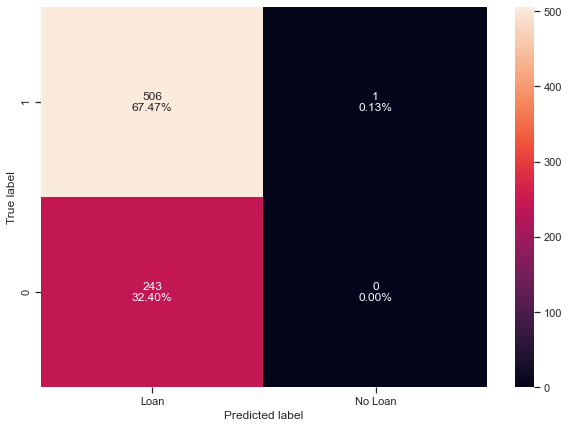

In [18]:
# Create confusion matrix on training set
make_confusion_matrix(y_train,pred_train)

In [19]:
#Now use the regression model to make predictions on the training set
pred_test = logreg.predict(X_test)

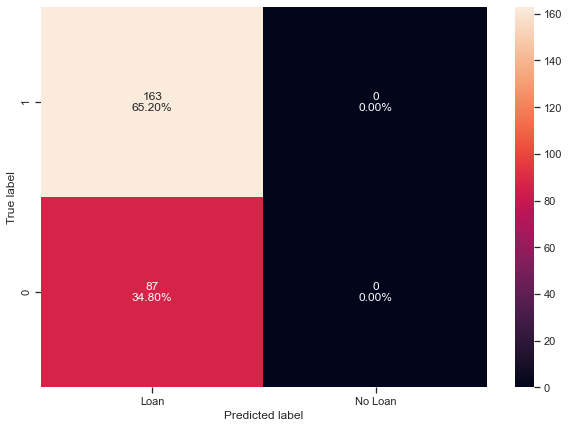

In [20]:
# Create confusion matrix on training set
make_confusion_matrix(y_test,pred_test)

In [21]:
#Use Sklearn to measure the accuracy of the training predictions and test predictions performed above.
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.6746666666666666
Accuracy on test data: 0.652


***
The model predicted with over 65% accuracy whether a review was 4 stars or higher based on the usefulness votes.
***